## ```logistic Regression```

#### this is used for classification of data in one form e.g. win/loss, etc.
#### this used for probability.
#### it's outcome is binary.

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [173]:
df=pd.read_csv("cust_satisfaction.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [174]:
df.duplicated()
df.duplicated().sum()

np.int64(172)

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
df.duplicated().sum()

np.int64(0)

In [177]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [178]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [179]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [180]:
loyal_customer=df[df['Customer Type']=='Loyal Customer']
disloyal_customer=df[df['Customer Type']=='disloyal Customer']

In [181]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [182]:
balance_df=pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df.shape

(38905, 12)

In [183]:
cat_col=balance_df.select_dtypes(include='object')
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
34630,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
17484,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
81792,Female,Loyal Customer,Business travel,Business,satisfied
16551,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
33666,Male,Loyal Customer,Business travel,Business,satisfied


In [184]:
#cat_col=cat_col.drop([])

In [185]:
num_col=balance_df.select_dtypes(exclude=["object"])
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
34630,48,718,2,2,3,10,5.0
17484,40,1199,1,2,1,0,8.0
81792,55,2051,5,5,5,0,10.0
16551,32,101,2,4,2,0,0.0
33666,42,986,3,3,4,0,0.0


In [186]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

ohe=OneHotEncoder(drop='if_binary')
cat_cal_encoded=ohe.fit_transform(cat_col).toarray()
cat_cal_encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [187]:
column_names=list(ohe.get_feature_names_out())
column_names

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [188]:
one_hot=pd.DataFrame(cat_cal_encoded,columns=column_names)
one_hot.head()


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [189]:
one_hot=one_hot.reset_index(drop=True)# to prevent from giving null values after concating 
num_col=num_col.reset_index(drop=True)

In [190]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,48,718,2,2,3,10,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,40,1199,1,2,1,0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,55,2051,5,5,5,0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,32,101,2,4,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42,986,3,3,4,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [191]:
matrix=final_df.corr()
matrix

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.000000,0.140821,0.078607,-0.045980,0.056738,-0.000540,-0.003717,0.010806,-0.380488,0.074930,0.175952,-0.184324,0.019718,0.122620
Flight Distance,0.140821,1.000000,0.121231,0.053566,0.093647,0.009414,0.005052,0.015936,-0.331688,-0.127001,0.378587,-0.339524,-0.077523,0.279009
Inflight entertainment,0.078607,0.121231,1.000000,0.245437,0.800717,-0.016068,-0.019482,0.006178,-0.143073,-0.062262,0.138011,-0.124219,-0.027318,0.285530
Baggage handling,-0.045980,0.053566,0.245437,1.000000,0.064115,-0.015162,-0.020193,0.023831,0.031895,-0.039356,0.245018,-0.204221,-0.082779,0.232153
Cleanliness,0.056738,0.093647,0.800717,0.064115,1.000000,0.000947,-0.000236,0.005799,-0.108554,-0.020350,0.094101,-0.084083,-0.019918,0.215934
Departure Delay in Minutes,-0.000540,0.009414,-0.016068,-0.015162,0.000947,1.000000,0.965814,0.009812,0.001433,-0.009861,-0.016071,0.016083,-0.000218,-0.037608
Arrival Delay in Minutes,-0.003717,0.005052,-0.019482,-0.020193,-0.000236,0.965814,1.000000,0.006231,0.002093,-0.009598,-0.021079,0.020144,0.001710,-0.045621
Gender_Male,0.010806,0.015936,0.006178,0.023831,0.005799,0.009812,0.006231,1.000000,-0.043184,0.019709,0.022124,-0.004568,-0.036628,0.019809
Customer Type_disloyal Customer,-0.380488,-0.331688,-0.143073,0.031895,-0.108554,0.001433,0.002093,-0.043184,1.000000,-0.458984,-0.114399,0.157513,-0.091987,-0.251504
Type of Travel_Personal Travel,0.074930,-0.127001,-0.062262,-0.039356,-0.020350,-0.009861,-0.009598,0.019709,-0.458984,1.000000,-0.377002,0.322302,0.110404,-0.270064


<Axes: >

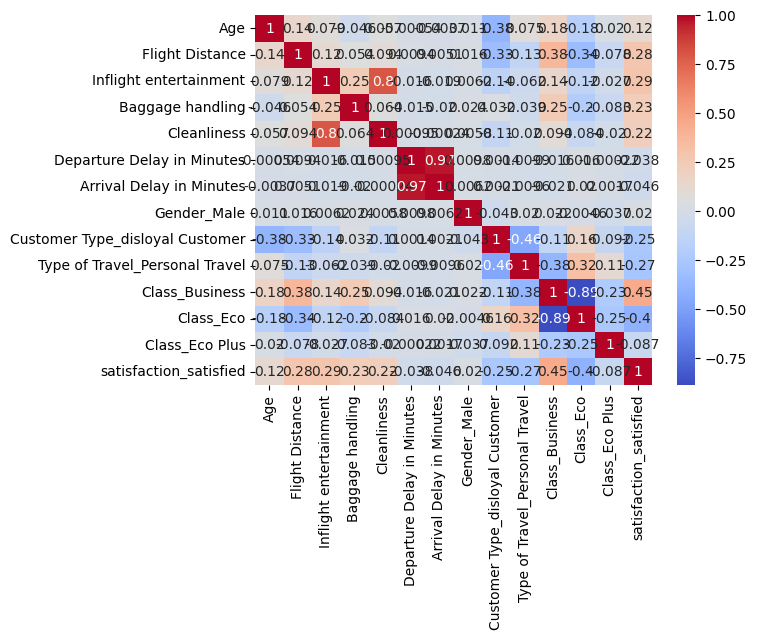

In [192]:
sns.heatmap(matrix,annot=True,cmap="coolwarm")


In [193]:
x=final_df.drop("satisfaction_satisfied",axis=1)
y=final_df["satisfaction_satisfied"]

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [195]:
# deep learning
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transform=sc.fit_transform(x_train)
x_test_transform=sc.transform(x_test)


In [196]:
# define your ann model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [197]:
x_train.shape

(31124, 13)

In [198]:
#initialising Sequential
model=Sequential()
# Initialize the model
# Input layer + first hidden layer
#model.add(Dense(    -->no of neurons -> activation -->input dimension ))

model.add(Dense(68, activation="relu", input_dim=x_train_transform.shape[1]))

# Hidden layers
model.add(Dense(32, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display model summary
model.summary()


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 68)             │           952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,265 (16.66 KB)

 Trainable params: 4,265 (16.66 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
# Total params: 4,265 (16.66 KB) this means a particular layer has 4,265 parameters that are need to be train
#these are calculated by formula (n_in + 1) * n_out here, n is the number of inputs
#e.g
((13+1)*68)+(68+1)*32+(32+1)*24+(24+1)*12+(12+1)*1


4265

#### for finding optimal epochs we need regularisation techniques

In [200]:
history=model.fit(x_train_transform,
                  y_train,
                  epochs=10,
                  validation_data=(x_test_transform,y_test),
                  )

Epoch 1/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7954 - loss: 0.4484 - val_accuracy: 0.8358 - val_loss: 0.3886
Epoch 2/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.3655 - val_accuracy: 0.8391 - val_loss: 0.3832
Epoch 3/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.3629 - val_accuracy: 0.8433 - val_loss: 0.3750
Epoch 4/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.3600 - val_accuracy: 0.8494 - val_loss: 0.3648
Epoch 5/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8522 - loss: 0.3525 - val_accuracy: 0.8430 - val_loss: 0.3673
Epoch 6/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8544 - loss: 0.3512 - val_accuracy: 0.8465 - val_loss: 0.3646
Epoch 7/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8540 - loss: 0.3477 - val_accuracy: 0.8471 - val_loss: 0.3624
Epoch 8/10
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8564 - loss: 0.3418 - val_accuracy: 0.

In [201]:
## prediction
y_pred=model.predict(x_test_transform)
prediction_label=(y_pred>0.5).astype(int).ravel()
prediction_label

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([0, 0, 0, ..., 0, 0, 1])

In [202]:
# to save model
model.save("logistic_model.keras")

In [203]:
# to load model
from tensorflow.keras.models import load_model
model=load_model("logistic_model.keras")